# Zadanie domowe

W przypadku obrazów w odcieniach szarości pojedynczy piksel z zakresu [0; 255] reprezentowany jest jako 8-bitowa liczba bez znaku.
Pewnym rozszerzeniem analizy sposobu reprezentacji obrazu może być następujący eksperyment.
Załóżmy, że z każdego z 8 bitów możemy stworzyć pojedynczy obraz binarny (ang. _bit-plane slicing_).
Dla obrazka _100zloty.jpg_ (https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/100zloty.jpg) stwórz 8 obrazów, z których każdy powinien zawierać jedną płaszczyznę bitową.
Podpowiedź $-$ warto sprawdzić, jak realizuje się bitowe operacje logiczne.
Zastosowanie takiej dekompozycji obrazu pozwala na analizę ,,ważności'' poszczególnych bitów.
Jest to użyteczne w kwantyzacji, ale także w kompresji.

W drugim etapie zadania proszę spróbować odtworzyć obraz oryginalny z mniejszej liczby obrazów binarnych.
Warto zacząć od dwóch najbardziej znaczących bitów, a później dodawać kolejne.
Należy utworzyć co najmniej trzy wersje zrekonstruowanych obrazów.
Podpowiedź $-$ rekonstrukcja obrazu to mnożenie przez odpowiednią potęgę liczby 2 (przesunięcie bitowe) oraz dodawanie.

In [1]:
import cv2
import os
import requests
import matplotlib.pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/vision-agh/poc_sw/master/02_Point/'
fileName = '100zloty.jpg'
if not os.path.exists(fileName) :
    r = requests.get(url + fileName, allow_redirects=True)
    open(fileName, 'wb').write(r.content)

In [2]:
banknot = cv2.imread('100zloty.jpg')

### Bit-plane slicing

In [3]:
def bit_plane_slice(img):
    return [((img << i) & (1<<7)) > 0 for i in range(8)]
slices = bit_plane_slice(banknot)

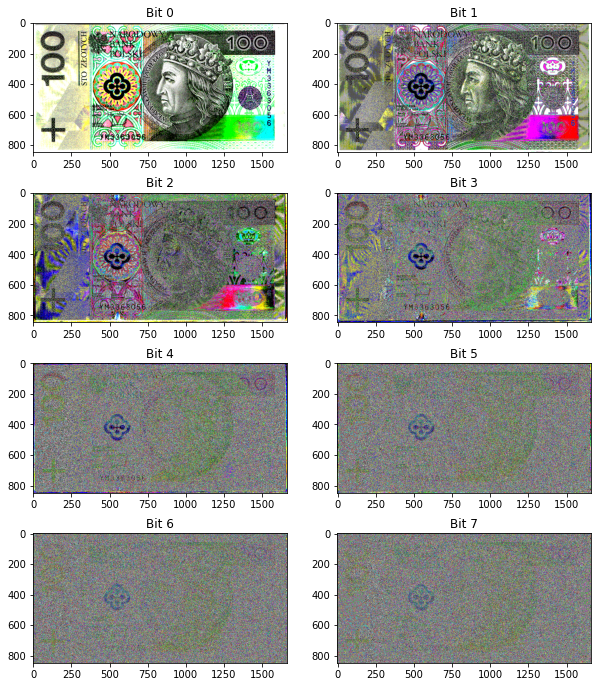

In [4]:
fig, axs = plt.subplots(nrows=4, ncols=2, figsize=(10,12))
for i, (s, ax) in enumerate(zip(slices, axs.flatten())):
    ax.imshow(s.astype('uint8')*255)
    ax.set_title(f"Bit {i}")

### Rekonstrukcje

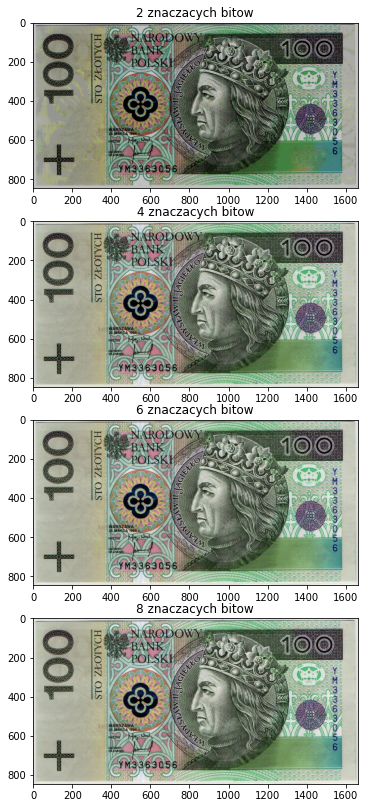

In [5]:
reconstruction = np.zeros_like(banknot)

fig, axs = plt.subplots(nrows=4, figsize=(6,14))
for i, s in enumerate(slices):
    reconstruction += s.astype('uint8') << (7-i)
    if i%2 != 0:
        axs[int(i/2)].set_title(f"{i+1} znaczacych bitow")
        axs[int(i/2)].imshow(reconstruction)